## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "pymaceuticals/data/Mouse_metadata.csv"
study_results = "pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_file = pd.merge(study_results, mouse_metadata, how = 'left', on='Mouse ID')

In [2]:
combined_file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
#Remove duplicates
file_without_dup = combined_file[combined_file['Mouse ID'].isin(combined_file.loc[combined_file.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique())==False]
file_without_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = file_without_dup.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = file_without_dup.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = file_without_dup.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = file_without_dup.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = file_without_dup.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
df_table = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Std. Dev.":standard_dev,
                              "Tumor Volume Std. Err.":sem})
df_table.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

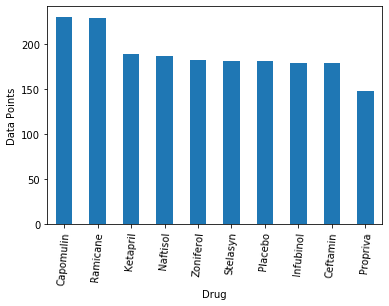

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

counts = file_without_dup['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug")
plt.xticks(rotation=85)
plt.ylabel("Data Points")
plt.show()

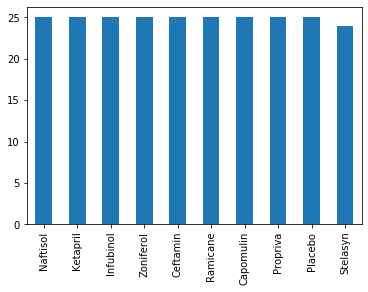

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = mouse_metadata['Drug Regimen'].value_counts()
counts.plot(kind="bar")

plt.show()


## Pie plots

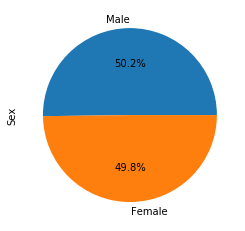

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_gender = mouse_metadata.Sex.value_counts()
count_gender.plot(kind="pie",autopct='%1.1f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

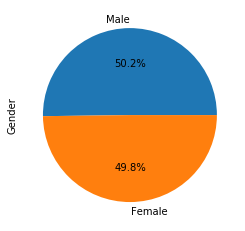

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_gender = mouse_metadata.Sex.value_counts()
plt.pie(count_gender.values,labels=count_gender.index.values,autopct='%1.1f%%')
plt.ylabel("Gender")
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#group and find big 
large_tumor = file_without_dup.groupby(["Mouse ID"]).max()
large_tumor = large_tumor.reset_index()
# Merge with dataframe 
merged_data = large_tumor[['Mouse ID','Timepoint']].merge(file_without_dup,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Find outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)


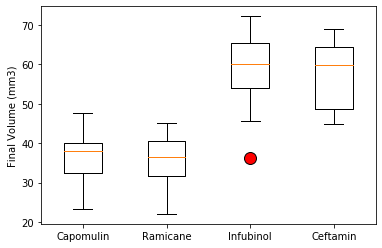

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Volume (mm3)')
plt.show()

## Line and scatter plots

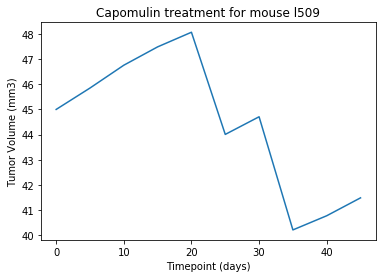

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data= file_without_dup.loc[file_without_dup['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_data.loc[capomulin_data['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment for mouse l509')
plt.show()

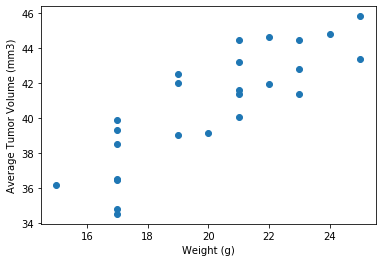

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = file_without_dup.loc[file_without_dup['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

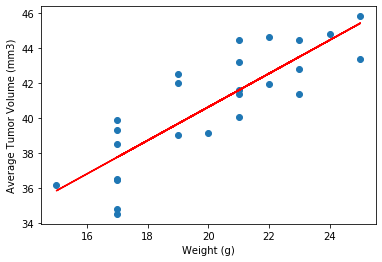

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()